In [1]:
import torch 
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

dev = torch.device('cpu')
if torch.cuda.is_available():
    print("CUDA is available, running on GPU")
    dev = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    print("CUDA not available, running on CPU")

class MultiLayerNet(torch.nn.Module):

    def __init__(self, num_input_neurons, num_hidden_neurons, num_output_neurons):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MultiLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(num_input_neurons, num_hidden_neurons)
        self.linear2 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear3 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear4 = torch.nn.Linear(num_hidden_neurons, num_output_neurons)

        torch.nn.init.constant_(self.linear1.bias, 0.)
        torch.nn.init.constant_(self.linear2.bias, 0.)
        torch.nn.init.constant_(self.linear3.bias, 0.)
        torch.nn.init.constant_(self.linear4.bias, 0.)

        torch.nn.init.normal_(self.linear1.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear2.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear3.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear4.weight, mean=0, std=0.1)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """

        y1 = torch.tanh(self.linear1(x))
        y2 = torch.tanh(self.linear2(y1))
        y3 = torch.tanh(self.linear3(y2))
        y = self.linear4(y3)
        return y
    
    """
    In summary, this code defines a simple feedforward neural network with multiple 
    hidden layers and initializes its parameters using PyTorch's torch.nn module. The 
    activation function used in the hidden layers is the hyperbolic tangent (tanh).
    """

CUDA not available, running on CPU


In [2]:
class IntegrationLoss:
    def __init__(self, numIntType, dim):
        print("Constructor: IntegrationLoss ", numIntType, " in ", dim, " dimension ")
        self.type = numIntType
        self.dim = dim

    def lossInternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        return self.approxIntegration(f, x, dx, dy, dz, shape)

    def lossExternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        """Computes the external energy loss using either the trapezoidal or
        Simpson's rule based on the specified integration type."""
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 2:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 2:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)

    def approxIntegration(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        
        """Approximates the integration using either the trapezoidal or Simpson's
        rule based on the specified integration type and dimension."""
        
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 1:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.trapz3D(f, xyz=x, shape=shape)
                else:
                    return self.trapz3D(f, dx=dx, dy=dy, dz=dz, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 1:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.simps3D(f, xyz=x, shape=shape)
                else:
                    return self.simps3D(f, dx=dx, dy=dy, dz=dz, shape=shape)

    def trapz1D(self, y, x=None, dx=1.0, axis=-1):
        y1D = y.flatten()
        if x is not None:
            x1D = x.flatten()
            return self.trapz(y1D, x1D, dx=dx, axis=axis)
        else:
            return self.trapz(y1D, dx=dx)

    def trapz2D(self, f, xy=None, dx=None, dy=None, shape=None):
#         Creating a 2D array
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            """
            If the spacing is not provided, it assumes that xy 
            contains the coordinates of the points in the form of 
            xy[:, 0] for x-coordinates and xy[:, 1] for y-coordinates.
            """
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
#             Performing numerical integraton along y and x axes respectively
#             by calling 1D trapezoidal integration function twice
            return self.trapz(self.trapz(f2D, y[0, :]), x[:, 0])
        else:
            return self.trapz(self.trapz(f2D, dx=dy), dx=dx)

    def trapz3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.trapz(self.trapz(self.trapz(f3D, dx=dz), dx=dy), dx=dx)

    def simps1D(self, f, x=None, dx=1.0, axis=-1):
        f1D = f.flatten()
        if x is not None:
            # Converting the array (x) into a 1D array 
            x1D = x.flatten()
            return self.simps(f1D, x1D, dx=dx, axis=axis)
        else:
            return self.simps(f1D, dx=dx, axis=axis)

    def simps2D(self, f, xy=None, dx=None, dy=None, shape=None):
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
            return self.simps(self.simps(f2D, y[0, :]), x[:, 0])
        else:
            return self.simps(self.simps(f2D, dx=dy), dx=dx)

    def simps3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.simps(self.simps(self.simps(f3D, dx=dz), dx=dy), dx=dx)

    def montecarlo1D(self, fx, l):
        return l * torch.sum(fx) / fx.data.nelement()

    def montecarlo2D(self, fxy, lx, ly):
        area = lx * ly
        return area * torch.sum(fxy) / fxy.data.nelement()

    def montecarlo3D(self, fxyz, lx, ly, lz):
        volume = lx * ly * lz
        return volume * torch.sum(fxyz) / fxyz.data.nelement()

    def simps(self, y, x=None, dx=1, axis=-1, even='avg'):
        # import scipy.integrate as sp
        # sp.simps()
        # y = torch.tensor(y)
        nd = len(y.shape)
        N = y.shape[axis]
        last_dx = dx
        first_dx = dx
        returnshape = 0
        if x is not None:
            # x = torch.tensor(x)
            if len(x.shape) == 1:
                shapex = [1] * nd
                shapex[axis] = x.shape[0]
                saveshape = x.shape
                returnshape = 1
                x = x.reshape(tuple(shapex))
            elif len(x.shape) != len(y.shape):
                raise ValueError("If given, shape of x must be 1-d or the "
                                 "same as y.")
            if x.shape[axis] != N:
                raise ValueError("If given, length of x along axis must be the "
                                 "same as y.")
        if N % 2 == 0:
            val = 0.0
            result = 0.0
            slice1 = (slice(None),) * nd
            slice2 = (slice(None),) * nd
            if even not in ['avg', 'last', 'first']:
                raise ValueError("Parameter 'even' must be "
                                 "'avg', 'last', or 'first'.")
            # Compute using Simpson's rule on first intervals
            if even in ['avg', 'first']:
                slice1 = self.tupleset(slice1, axis, -1)
                slice2 = self.tupleset(slice2, axis, -2)
                if x is not None:
                    last_dx = x[slice1] - x[slice2]
                val += 0.5 * last_dx * (y[slice1] + y[slice2])
                result = self._basic_simps(y, 0, N - 3, x, dx, axis)
            # Compute using Simpson's rule on last set of intervals
            if even in ['avg', 'last']:
                slice1 = self.tupleset(slice1, axis, 0)
                slice2 = self.tupleset(slice2, axis, 1)
                if x is not None:
                    first_dx = x[tuple(slice2)] - x[tuple(slice1)]
                val += 0.5 * first_dx * (y[slice2] + y[slice1])
                result += self._basic_simps(y, 1, N - 2, x, dx, axis)
            if even == 'avg':
                val /= 2.0
                result /= 2.0
            result = result + val
        else:
            result = self._basic_simps(y, 0, N - 2, x, dx, axis)
        if returnshape:
            x = x.reshape(saveshape)
        return result

    def tupleset(self, t, i, value):
        l = list(t)
        l[i] = value
        return tuple(l)

    def _basic_simps(self, y, start, stop, x, dx, axis):
        nd = len(y.shape)
        if start is None:
            start = 0
        step = 2
        slice_all = (slice(None),) * nd
        slice0 = self.tupleset(slice_all, axis, slice(start, stop, step))
        slice1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
        slice2 = self.tupleset(slice_all, axis, slice(start + 2, stop + 2, step))

        if x is None:  # Even spaced Simpson's rule.
            result = torch.sum(dx / 3.0 * (y[slice0] + 4 * y[slice1] + y[slice2]), axis)
        else:
            # Account for possibly different spacings.
            #    Simpson's rule changes a bit.
            # h = np.diff(x, axis=axis)
            h = self.torch_diff_axis_0(x, axis=axis)
            sl0 = self.tupleset(slice_all, axis, slice(start, stop, step))
            sl1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
            h0 = h[sl0]
            h1 = h[sl1]
            hsum = h0 + h1
            hprod = h0 * h1
            h0divh1 = h0 / h1
            tmp = hsum / 6.0 * (y[slice0] * (2 - 1.0 / h0divh1) +
                                y[slice1] * hsum * hsum / hprod +
                                y[slice2] * (2 - h0divh1))
            result = torch.sum(tmp, dim=axis)
        return result

    def torch_diff_axis_0(self, a, axis):
        if axis == 0:
            return a[1:, 0:1] - a[:-1, 0:1]
        elif axis == -1:
            return a[1:] - a[:-1]
        else:
            print("Not implemented yet !!! function: torch_diff_axis_0 error !!!")
            exit()

    def trapz(self, y, x=None, dx=1.0, axis=-1):
        # y = np.asanyarray(y)
        if x is None:
            d = dx
        else:
            d = x[1:] - x[0:-1]
            # reshape to correct shape
            shape = [1] * y.ndimension()
            shape[axis] = d.shape[0]
            d = d.reshape(shape)
        nd = y.ndimension()
        slice1 = [slice(None)] * nd
        slice2 = [slice(None)] * nd
        slice1[axis] = slice(1, None)
        slice2[axis] = slice(None, -1)
        ret = torch.sum(d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0, axis)
        return ret

In [3]:
class TwoDBeam:

  def __init__(self, L, H, E, nu, t, N_H, N_L, c, c1, c2, N_Ltest=200, N_Htest=50,integration_type='trapezoidal', model_type='neohookean', num_neurons_per_layer=30, activation='tanh', actual_solution=None, epochs=5000):
    
    # The Bar physical parameters
    self.H = H
    self.L = L
    self.E = E
    self.nu = nu
    self.lambdaa = self.E*self.nu/((1+self.nu)*(1-2*self.nu))
    self.mu = self.E/(2*(1+self.nu)) 
    self.t = np.array(t)
    # Model Parameters
    self.N_L = N_L
    self.N_H = N_H
    self.N = self.N_H*self.N_L
    self.epochs = epochs
    self.xmin = 0
    self.xmax = self.L
    self.model = MultiLayerNet(2, num_neurons_per_layer, 2)
    self.model.to(dev)
    self.type=model_type
    # testing params
    self.num_test_x = N_Ltest
    self.num_test_y = N_Htest
    # Get the dataset
    self.data, self.neumannBC, self.dirichletBC = self.setup_domain()
    self.x, self.y, self.datatest = self.get_dataset()

    self.learning_rate = 1e-1
    self.optimizer = torch.optim.LBFGS(self.model.parameters(), lr=self.learning_rate, max_iter=self.epochs)
    self.actual_solution = actual_solution
    #Mooney-rivlin params
    self.c = c
    self.c1 = c1
    self.c2 = c2
    self.d = 2*(self.c1+2*self.c2)
    # Initialize the loss array
    self.loss_array = []
    # Get the Integration Schemes via the IntegrationLoss Class
    self.intLoss = IntegrationLoss(integration_type, 2)

  def train_model(self):
    x = torch.from_numpy(self.data).float()
    x = x.to(dev)
    x.requires_grad_(True)

    hx = (self.L-self.xmin)/(self.N_L-1)
    hy = (self.H - 0)/(self.N_H-1)

     # get tensor inputs and outputs for boundary conditions
    # -------------------------------------------------------------------------------
    #                             Dirichlet BC
    # -------------------------------------------------------------------------------
    dirBC_coordinates = {}  # declare a dictionary
    dirBC_values = {}  # declare a dictionary
    dirBC_penalty = {}
    for i, keyi in enumerate(self.dirichletBC):
        dirBC_coordinates[i] = torch.from_numpy(self.dirichletBC[keyi]['coord']).float().to(dev)
        dirBC_values[i] = torch.from_numpy(self.dirichletBC[keyi]['known_value']).float().to(dev)
        dirBC_penalty[i] = torch.tensor(self.dirichletBC[keyi]['penalty']).float().to(dev)
    # -------------------------------------------------------------------------------
    #                           Neumann BC
    # -------------------------------------------------------------------------------
    neuBC_coordinates = {}  # declare a dictionary
    neuBC_values = {}  # declare a dictionary
    neuBC_penalty = {}
    for i, keyi in enumerate(self.neumannBC):
        neuBC_coordinates[i] = torch.from_numpy(self.neumannBC[keyi]['coord']).float().to(dev)
        neuBC_coordinates[i].requires_grad_(True)
        neuBC_values[i] = torch.from_numpy(self.neumannBC[keyi]['known_value']).float().to(dev)
        neuBC_penalty[i] = torch.tensor(self.neumannBC[keyi]['penalty']).float().to(dev)

    # ----------------------------------------------------------------------------------
    # Minimizing loss function (energy and boundary conditions)
    # ----------------------------------------------------------------------------------
    start_time = time.time()
    energy_loss_array = []
    boundary_loss_array = []

    for t in range(self.epochs):
        # Zero gradients, perform a backward pass, and update the weights.
        def closure():
          it_time = time.time()
          # ----------------------------------------------------------------------------------
          # Internal Energy
          # ----------------------------------------------------------------------------------
          u_pred = self.getU(x)
          u_pred.double()
          storedEnergy = self.getStoredEnergy(u_pred, x)
          internal2 = self.intLoss.lossInternalEnergy(storedEnergy, dx=hx, dy=hy, shape=[self.N_L, self.N_H])
          external2 = torch.zeros(len(neuBC_coordinates))
          for i, vali in enumerate(neuBC_coordinates):
              neu_u_pred = self.getU(neuBC_coordinates[i])
              fext = torch.bmm((neu_u_pred + neuBC_coordinates[i]).unsqueeze(1), neuBC_values[i].unsqueeze(2))
              external2[i] = self.intLoss.lossExternalEnergy(fext, dx=hy)
          bc_u_crit = torch.zeros((len(dirBC_coordinates)))
          for i, vali in enumerate(dirBC_coordinates):
              dir_u_pred = self.getU(dirBC_coordinates[i])
              bc_u_crit[i] = self.loss_squared_sum(dir_u_pred, dirBC_values[i])
          energy_loss = internal2 - torch.sum(external2)
          boundary_loss = torch.sum(bc_u_crit)
          loss = internal2 - torch.sum(external2) + boundary_loss
          self.optimizer.zero_grad()
          loss.backward()
          print('Iter: %d Loss: %.9e Energy: %.9e Boundary: %.9e Time: %.3e'
                % (t + 1, loss.item(), energy_loss.item(), boundary_loss.item(), time.time() - it_time))
          energy_loss_array.append(energy_loss.data)
          boundary_loss_array.append(boundary_loss.data)
          self.loss_array.append(loss.data)
          return loss
        self.optimizer.step(closure)
    elapsed = time.time() - start_time
    print('Training time: %.4f' % elapsed)

    z = np.array([0])
    U, S11, S12, S13, S22, S23, S33, E11, E12, E13, E22, E23, E33, SVonMises, F11, F12, F21, F22 = self.evaluate_model(self.x, self.y, z)
    self.surUx, self.surUy, self.surUz = U
    self.SVonMises = SVonMises
    print(self.surUx.shape, self.surUy.shape, self.x.shape, self.y.shape)


  def getU(self, x):
    u = self.model(x)
    Ux = x[:, 0] * u[:, 0]
    Uy = x[:, 0] * u[:, 1]
    Ux = Ux.reshape(Ux.shape[0], 1)
    Uy = Uy.reshape(Uy.shape[0], 1)
    u_pred = torch.cat((Ux, Uy), -1)
    return u_pred

  def getStoredEnergy(self, u, x):
    if self.type == 'neohookean':
      return self.NeoHookean2D(u, x)
    if self.type == 'mooneyrivlin':
      return self.MooneyRivlin2D(u, x)

  def MooneyRivlin2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    C11 = Fxx * Fxx + Fyx * Fyx
    C12 = Fxx * Fxy + Fyx * Fyy
    C21 = Fxy * Fxx + Fyy * Fyx
    C22 = Fxy * Fxy + Fyy * Fyy
    J = detF
    traceC = C11 + C22
    I1 = traceC
    trace_C2 = C11 * C11 + C12 * C21 + C21 * C12 + C22 * C22
    I2 = 0.5 * (traceC ** 2 - trace_C2)
    strainEnergy = self.c * (J - 1) ** 2 - self.d * torch.log(J) + self.c1 * (I1 - 2) + self.c2 * (I2 - 1)
    return strainEnergy

  def NeoHookean2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    trC = Fxx ** 2 + Fxy ** 2 + Fyx ** 2 + Fyy ** 2
    strainEnergy = 0.5 * self.lambdaa * (torch.log(detF) * torch.log(detF)) - self.mu * torch.log(detF) + 0.5 * self.mu * (trC - 2)
    return strainEnergy

  def setup_domain(self):
  
    x_dom = self.xmin, self.L, self.N_L
    y_dom = 0, self.H, self.N_H
    # create points
    lin_x = np.linspace(x_dom[0], x_dom[1], x_dom[2])
    lin_y = np.linspace(y_dom[0], y_dom[1], y_dom[2])
    dom = np.zeros((self.N_L * self.N_H, 2))
    c = 0
    for x in np.nditer(lin_x):
        tb = y_dom[2] * c
        te = tb + y_dom[2]
        c += 1
        dom[tb:te, 0] = x
        dom[tb:te, 1] = lin_y
    print(dom.shape)
    np.meshgrid(lin_x, lin_y)
    fig = plt.figure(figsize=(5, 1))
    ax = fig.add_subplot(111)
    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.set_xlabel('X', fontsize=3)
    ax.set_ylabel('Y', fontsize=3)
    ax.tick_params(labelsize=4)
    # ------------------------------------ BOUNDARY ----------------------------------------
    # Left boundary condition (Dirichlet BC)
    bcl_u_pts_idx = np.where(dom[:, 0] == self.xmin)
    bcl_u_pts = dom[bcl_u_pts_idx, :][0]
    bcl_u = np.ones(np.shape(bcl_u_pts)) * [0, 0]

    # Right boundary condition (Neumann BC)
    bcr_t_pts_idx = np.where(dom[:, 0] == self.L)
    bcr_t_pts = dom[bcr_t_pts_idx, :][0]
    bcr_t = np.ones(np.shape(bcr_t_pts)) * self.t

    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.scatter(bcl_u_pts[:, 0], bcl_u_pts[:, 1], s=0.5, facecolor='red')
    ax.scatter(bcr_t_pts[:, 0], bcr_t_pts[:, 1], s=0.5, facecolor='green')
    plt.show()
    # exit()
    boundary_neumann = {
        # condition on the right
        "neumann_1": {
            "coord": bcr_t_pts,
            "known_value": bcr_t,
            "penalty": 1.0
        }
        # adding more boundary condition here ...
    }
    boundary_dirichlet = {
        # condition on the left
        "dirichlet_1": {
            "coord": bcl_u_pts,
            "known_value": bcl_u,
            "penalty": 1.0
        }
        # adding more boundary condition here ...
    }
    return dom, boundary_neumann, boundary_dirichlet

  def evaluate_model(self, x, y, z):
    energy_type = self.type
    mu = self.mu
    lmbda = self.lambdaa
    dim = 2
    if dim == 2:
      Nx = len(x)
      Ny = len(y)
      xGrid, yGrid = np.meshgrid(x, y)
      x1D = xGrid.flatten()
      y1D = yGrid.flatten()
      xy = np.concatenate((np.array([x1D]).T, np.array([y1D]).T), axis=-1)
      xy_tensor = torch.from_numpy(xy).float()
      xy_tensor = xy_tensor.to(dev)
      xy_tensor.requires_grad_(True)
      # u_pred_torch = self.model(xy_tensor)
      u_pred_torch = self.getU(xy_tensor)
      duxdxy = grad(u_pred_torch[:, 0].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                      create_graph=True, retain_graph=True)[0]
      duydxy = grad(u_pred_torch[:, 1].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                      create_graph=True, retain_graph=True)[0]
      F11 = duxdxy[:, 0].unsqueeze(1) + 1
      F12 = duxdxy[:, 1].unsqueeze(1) + 0
      F21 = duydxy[:, 0].unsqueeze(1) + 0
      F22 = duydxy[:, 1].unsqueeze(1) + 1
      detF = F11 * F22 - F12 * F21
      invF11 = F22 / detF
      invF22 = F11 / detF
      invF12 = -F12 / detF
      invF21 = -F21 / detF
      C11 = F11**2 + F21**2
      C12 = F11*F12 + F21*F22
      C21 = F12*F11 + F22*F21
      C22 = F12**2 + F22**2
      E11 = 0.5 * (C11 - 1)
      E12 = 0.5 * C12
      E21 = 0.5 * C21
      E22 = 0.5 * (C22 - 1)
      if energy_type == 'neohookean' and dim == 2:
          P11 = mu * F11 + (lmbda * torch.log(detF) - mu) * invF11
          P12 = mu * F12 + (lmbda * torch.log(detF) - mu) * invF21
          P21 = mu * F21 + (lmbda * torch.log(detF) - mu) * invF12
          P22 = mu * F22 + (lmbda * torch.log(detF) - mu) * invF22
      else:
          print("This energy model will be implemented later !!!")
          exit()
      S11 = invF11 * P11 + invF12 * P21
      S12 = invF11 * P12 + invF12 * P22
      S21 = invF21 * P11 + invF22 * P21
      S22 = invF21 * P12 + invF22 * P22
      u_pred = u_pred_torch.detach().cpu().numpy()
      F11_pred = F11.detach().cpu().numpy()
      F12_pred = F12.detach().cpu().numpy()
      F21_pred = F21.detach().cpu().numpy()
      F22_pred = F22.detach().cpu().numpy()
      E11_pred = E11.detach().cpu().numpy()
      E12_pred = E12.detach().cpu().numpy()
      E21_pred = E21.detach().cpu().numpy()
      E22_pred = E22.detach().cpu().numpy()
      S11_pred = S11.detach().cpu().numpy()
      S12_pred = S12.detach().cpu().numpy()
      S21_pred = S21.detach().cpu().numpy()
      S22_pred = S22.detach().cpu().numpy()
      surUx = u_pred[:, 0].reshape(Ny, Nx, 1)
      surUy = u_pred[:, 1].reshape(Ny, Nx, 1)
      surUz = np.zeros([Nx, Ny, 1])
      surE11 = E11_pred.reshape(Ny, Nx, 1)
      surE12 = E12_pred.reshape(Ny, Nx, 1)
      surE13 = np.zeros([Nx, Ny, 1])
      surE21 = E21_pred.reshape(Ny, Nx, 1)
      surE22 = E22_pred.reshape(Ny, Nx, 1)
      surE23 = np.zeros([Nx, Ny, 1])
      surE33 = np.zeros([Nx, Ny, 1])
      surS11 = S11_pred.reshape(Ny, Nx, 1)
      surS12 = S12_pred.reshape(Ny, Nx, 1)
      surS13 = np.zeros([Nx, Ny, 1])
      surS21 = S21_pred.reshape(Ny, Nx, 1)
      surS22 = S22_pred.reshape(Ny, Nx, 1)
      surS23 = np.zeros([Nx, Ny, 1])
      surS33 = np.zeros([Nx, Ny, 1])
      SVonMises = np.float64(np.sqrt(0.5 * ((surS11 - surS22) ** 2 + (surS22) ** 2 + (-surS11) ** 2 + 6 * (surS12 ** 2))))
      U = (np.float64(surUx), np.float64(surUy), np.float64(surUz))
      return U, np.float64(surS11), np.float64(surS12), np.float64(surS13), np.float64(surS22), np.float64(
        surS23), \
            np.float64(surS33), np.float64(surE11), np.float64(surE12), \
            np.float64(surE13), np.float64(surE22), np.float64(surE23), np.float64(surE33), np.float64(
        SVonMises), \
            np.float64(F11_pred), np.float64(F12_pred), np.float64(F21_pred), np.float64(F22_pred)
    else:
      Nx = len(x)
      Ny = len(y)
      Nz = len(z)
      xGrid, yGrid, zGrid = np.meshgrid(x, y, z)
      x1D = xGrid.flatten()
      y1D = yGrid.flatten()
      z1D = zGrid.flatten()
      xyz = np.concatenate((np.array([x1D]).T, np.array([y1D]).T, np.array([z1D]).T), axis=-1)
      xyz_tensor = torch.from_numpy(xyz).float()
      xyz_tensor = xyz_tensor.to(dev)
      xyz_tensor.requires_grad_(True)
      # u_pred_torch = self.model(xyz_tensor)
      u_pred_torch = self.getU(xyz_tensor)
      duxdxyz = grad(u_pred_torch[:, 0].unsqueeze(1), xyz_tensor, torch.ones(xyz_tensor.size()[0], 1, device=dev),
                      create_graph=True, retain_graph=True)[0]
      duydxyz = grad(u_pred_torch[:, 1].unsqueeze(1), xyz_tensor, torch.ones(xyz_tensor.size()[0], 1, device=dev),
                      create_graph=True, retain_graph=True)[0]
      duzdxyz = grad(u_pred_torch[:, 2].unsqueeze(1), xyz_tensor, torch.ones(xyz_tensor.size()[0], 1, device=dev),
                      create_graph=True, retain_graph=True)[0]
      F11 = duxdxyz[:, 0].unsqueeze(1) + 1
      F12 = duxdxyz[:, 1].unsqueeze(1) + 0
      F13 = duxdxyz[:, 2].unsqueeze(1) + 0
      F21 = duydxyz[:, 0].unsqueeze(1) + 0
      F22 = duydxyz[:, 1].unsqueeze(1) + 1
      F23 = duydxyz[:, 2].unsqueeze(1) + 0
      F31 = duzdxyz[:, 0].unsqueeze(1) + 0
      F32 = duzdxyz[:, 1].unsqueeze(1) + 0
      F33 = duzdxyz[:, 2].unsqueeze(1) + 1
      detF = F11 * (F22 * F33 - F23 * F32) - F12 * (F21 * F33 - F23 * F31) + F13 * (F21 * F32 - F22 * F31)
      invF11 = (F22 * F33 - F23 * F32) / detF
      invF12 = -(F12 * F33 - F13 * F32) / detF
      invF13 = (F12 * F23 - F13 * F22) / detF
      invF21 = -(F21 * F33 - F23 * F31) / detF
      invF22 = (F11 * F33 - F13 * F31) / detF
      invF23 = -(F11 * F23 - F13 * F21) / detF
      invF31 = (F21 * F32 - F22 * F31) / detF
      invF32 = -(F11 * F32 - F12 * F31) / detF
      invF33 = (F11 * F22 - F12 * F21) / detF
      C11 = F11 ** 2 + F21 ** 2 + F31 ** 2
      C12 = F11 * F12 + F21 * F22 + F31 * F32
      C13 = F11 * F13 + F21 * F23 + F31 * F33
      C21 = F12 * F11 + F22 * F21 + F32 * F31
      C22 = F12 ** 2 + F22 ** 2 + F32 ** 2
      C23 = F12 * F13 + F22 * F23 + F32 * F33
      C31 = F13 * F11 + F23 * F21 + F33 * F31
      C32 = F13 * F12 + F23 * F22 + F33 * F32
      C33 = F13 ** 2 + F23 ** 2 + F33 ** 2
      E11 = 0.5 * (C11 - 1)
      E12 = 0.5 * C12
      E13 = 0.5 * C13
      E21 = 0.5 * C21
      E22 = 0.5 * (C22 - 1)
      E23 = 0.5 * C23
      E31 = 0.5 * C31
      E32 = 0.5 * C32
      E33 = 0.5 * (C33 - 1)
      if energy_type == 'neohookean' and dim == 3:
          P11 = mu * F11 + (lmbda * torch.log(detF) - mu) * invF11
          P12 = mu * F12 + (lmbda * torch.log(detF) - mu) * invF21
          P13 = mu * F13 + (lmbda * torch.log(detF) - mu) * invF31
          P21 = mu * F21 + (lmbda * torch.log(detF) - mu) * invF12
          P22 = mu * F22 + (lmbda * torch.log(detF) - mu) * invF22
          P23 = mu * F23 + (lmbda * torch.log(detF) - mu) * invF32
          P31 = mu * F31 + (lmbda * torch.log(detF) - mu) * invF13
          P32 = mu * F32 + (lmbda * torch.log(detF) - mu) * invF23
          P33 = mu * F33 + (lmbda * torch.log(detF) - mu) * invF33
      else:
          print("This energy model will be implemented later !!!")
          exit()
      S11 = invF11 * P11 + invF12 * P21 + invF13 * P31
      S12 = invF11 * P12 + invF12 * P22 + invF13 * P32
      S13 = invF11 * P13 + invF12 * P23 + invF13 * P33
      S21 = invF21 * P11 + invF22 * P21 + invF23 * P31
      S22 = invF21 * P12 + invF22 * P22 + invF23 * P32
      S23 = invF21 * P13 + invF22 * P23 + invF23 * P33
      S31 = invF31 * P11 + invF32 * P21 + invF33 * P31
      S32 = invF31 * P12 + invF32 * P22 + invF33 * P32
      S33 = invF31 * P13 + invF32 * P23 + invF33 * P33
      u_pred = u_pred_torch.detach().cpu().numpy()
      F11_pred = F11.detach().cpu().numpy()
      F12_pred = F12.detach().cpu().numpy()
      F13_pred = F13.detach().cpu().numpy()
      F21_pred = F21.detach().cpu().numpy()
      F22_pred = F22.detach().cpu().numpy()
      F23_pred = F23.detach().cpu().numpy()
      F31_pred = F31.detach().cpu().numpy()
      F32_pred = F32.detach().cpu().numpy()
      F33_pred = F33.detach().cpu().numpy()
      E11_pred = E11.detach().cpu().numpy()
      E12_pred = E12.detach().cpu().numpy()
      E13_pred = E13.detach().cpu().numpy()
      E21_pred = E21.detach().cpu().numpy()
      E22_pred = E22.detach().cpu().numpy()
      E23_pred = E23.detach().cpu().numpy()
      E31_pred = E31.detach().cpu().numpy()
      E32_pred = E32.detach().cpu().numpy()
      E33_pred = E33.detach().cpu().numpy()
      S11_pred = S11.detach().cpu().numpy()
      S12_pred = S12.detach().cpu().numpy()
      S13_pred = S13.detach().cpu().numpy()
      S21_pred = S21.detach().cpu().numpy()
      S22_pred = S22.detach().cpu().numpy()
      S23_pred = S23.detach().cpu().numpy()
      S31_pred = S31.detach().cpu().numpy()
      S32_pred = S32.detach().cpu().numpy()
      S33_pred = S33.detach().cpu().numpy()
      surUx = u_pred[:, 0].reshape(Ny, Nx, Nz)
      surUy = u_pred[:, 1].reshape(Ny, Nx, Nz)
      surUz = u_pred[:, 2].reshape(Ny, Nx, Nz)
      surE11 = E11_pred.reshape(Ny, Nx, Nz)
      surE12 = E12_pred.reshape(Ny, Nx, Nz)
      surE13 = E13_pred.reshape(Ny, Nx, Nz)
      surE21 = E21_pred.reshape(Ny, Nx, Nz)
      surE22 = E22_pred.reshape(Ny, Nx, Nz)
      surE23 = E23_pred.reshape(Ny, Nx, Nz)
      surE31 = E31_pred.reshape(Ny, Nx, Nz)
      surE32 = E32_pred.reshape(Ny, Nx, Nz)
      surE33 = E33_pred.reshape(Ny, Nx, Nz)
      surS11 = S11_pred.reshape(Ny, Nx, Nz)
      surS12 = S12_pred.reshape(Ny, Nx, Nz)
      surS13 = S13_pred.reshape(Ny, Nx, Nz)
      surS21 = S21_pred.reshape(Ny, Nx, Nz)
      surS22 = S22_pred.reshape(Ny, Nx, Nz)
      surS23 = S23_pred.reshape(Ny, Nx, Nz)
      surS31 = S31_pred.reshape(Ny, Nx, Nz)
      surS32 = S32_pred.reshape(Ny, Nx, Nz)
      surS33 = S33_pred.reshape(Ny, Nx, Nz)
      SVonMises = np.float64(
          np.sqrt(0.5 * ((surS11 - surS22) ** 2 + (surS22 - surS33) ** 2 + (surS33 - surS11) ** 2 + 6 * (
                  surS12 ** 2 + surS23 ** 2 + surS31 ** 2))))
      U = (np.float64(surUx), np.float64(surUy), np.float64(surUz))
      S1 = (np.float64(surS11), np.float64(surS12), np.float64(surS13))
      S2 = (np.float64(surS21), np.float64(surS22), np.float64(surS23))
      S3 = (np.float64(surS31), np.float64(surS32), np.float64(surS33))
      E1 = (np.float64(surE11), np.float64(surE12), np.float64(surE13))
      E2 = (np.float64(surE21), np.float64(surE22), np.float64(surE23))
      E3 = (np.float64(surE31), np.float64(surE32), np.float64(surE33))
      return U, np.float64(surS11), np.float64(surS12), np.float64(surS13), np.float64(surS22), np.float64(surS23), \
              np.float64(surS33), np.float64(surE11), np.float64(surE12), \
              np.float64(surE13), np.float64(surE22), np.float64(surE23), np.float64(surE33), np.float64(SVonMises), \
              np.float64(F11_pred), np.float64(F12_pred), np.float64(F13_pred), \
              np.float64(F21_pred), np.float64(F22_pred), np.float64(F23_pred), \
              np.float64(F31_pred), np.float64(F32_pred), np.float64(F33_pred)

  def get_dataset(self):

    Nx = self.num_test_x
    Ny = self.num_test_y
    x_dom_test = self.xmin, self.L, Nx
    y_dom_test = 0, self.H, Ny
    # create points
    x_space = np.linspace(x_dom_test[0], x_dom_test[1], x_dom_test[2])
    y_space = np.linspace(y_dom_test[0], y_dom_test[1], y_dom_test[2])
    xGrid, yGrid = np.meshgrid(x_space, y_space)
    data_test = np.concatenate(
        (np.array([xGrid.flatten()]).T, np.array([yGrid.flatten()]).T), axis=1)
    return x_space, y_space, data_test

  @staticmethod
  def loss_sum(tinput):
    return torch.sum(tinput) / tinput.data.nelement()

  # --------------------------------------------------------------------------------
  # purpose: loss square sum for the boundary part
  # --------------------------------------------------------------------------------
  @staticmethod
  def loss_squared_sum(tinput, target):
    row, column = tinput.shape
    loss = 0
    for j in range(column):
        loss += torch.sum((tinput[:, j] - target[:, j]) ** 2) / tinput[:, j].data.nelement()
    return loss

  # --------------------------------------------------------------------------------
  # purpose: plotting loss convergence
  # --------------------------------------------------------------------------------
  def plot_loss_convergence(self):
      loss_array = self.loss_array
      print('Loss convergence')
      range = np.arange(1, len(loss_array) + 1)
      loss_plt, = plt.semilogx(range, loss_array, label='total loss')
      plt.legend(handles=[loss_plt])
      plt.xlabel('Iteration')
      plt.ylabel('Loss value')
      plt.show()


  def plot_deformed_displacement(self):

      
      X = self.datatest
      Nx = self.num_test_x
      Ny = self.num_test_y
      ux = np.reshape(self.surUx, (Nx*Ny, 1))
      uy = np.reshape(self.surUy, (Nx*Ny, 1))
      u = np.concatenate([ux, uy], axis=1)
      X_new = X + u
      s_von_mises = np.reshape(self.SVonMises, (Nx*Ny,))

      plt.figure(figsize=(7, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 0], cmap=cm.jet)
      plt.title('Displacement in X-direction')
      plt.colorbar()
      plt.figure(figsize=(7, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 1], cmap=cm.jet)
      plt.title('Dispalcement in y-direction')
      plt.colorbar()
      plt.figure(figsize=(7, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=s_von_mises, cmap=cm.jet)
      plt.title('Von-Mises Stress')
      plt.colorbar()
      plt.show()

      # Plot the line plots of uy and VOn Mises stress
      x = np.ones(shape=(1,1))
      y = np.expand_dims(np.linspace(start=0, stop=self.H, num=100),axis=-1)
      x = torch.from_numpy(x)
      y = torch.from_numpy(y)
      # uxy = self.getU(xy)
      z = np.array([0])
      u, s11, s12, s13, s22, s23, s33, e11, e12, e13, e22, e23, e33, svonMises, f11, f12, f21, f22 = self.evaluate_model(x, y, z)
      surux, suruy, suruz = u
      uy = np.reshape(suruy, (100, 1))
      svonmises = np.reshape(svonMises, (100,))
      plt.figure(figsize=(8, 3))
      plt.plot(y, uy)
      plt.title('Dispalcement at X=2 in y-direction')
      plt.show()

      plt.figure(figsize=(8, 3))
      plt.plot(y, svonmises)
      plt.title('Von-Mises Stress at X=2')
      plt.show()


(40000, 2)


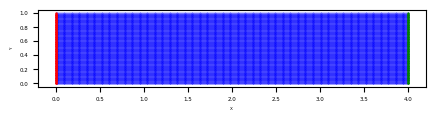

Constructor: IntegrationLoss  trapezoidal  in  2  dimension 
Iter: 1 Loss: 6.379520416e+00 Energy: 6.379520416e+00 Boundary: 0.000000000e+00 Time: 1.537e-01
Iter: 1 Loss: 5.835570335e+00 Energy: 5.835570335e+00 Boundary: 0.000000000e+00 Time: 8.130e-02
Iter: 1 Loss: 5.579638004e+00 Energy: 5.579638004e+00 Boundary: 0.000000000e+00 Time: 7.206e-02
Iter: 1 Loss: 5.278193474e+00 Energy: 5.278193474e+00 Boundary: 0.000000000e+00 Time: 7.351e-02
Iter: 1 Loss: 5.002267838e+00 Energy: 5.002267838e+00 Boundary: 0.000000000e+00 Time: 7.362e-02
Iter: 1 Loss: 4.747347832e+00 Energy: 4.747347832e+00 Boundary: 0.000000000e+00 Time: 7.291e-02
Iter: 1 Loss: 4.515459538e+00 Energy: 4.515459538e+00 Boundary: 0.000000000e+00 Time: 7.234e-02
Iter: 1 Loss: 4.305682182e+00 Energy: 4.305682182e+00 Boundary: 0.000000000e+00 Time: 7.612e-02
Iter: 1 Loss: 4.115968227e+00 Energy: 4.115968227e+00 Boundary: 0.000000000e+00 Time: 7.614e-02
Iter: 1 Loss: 3.943684101e+00 Energy: 3.943684101e+00 Boundary: 0.000000000

Iter: 2 Loss: 1.141154766e-01 Energy: 1.141154766e-01 Boundary: 0.000000000e+00 Time: 9.469e-02
Iter: 2 Loss: 1.113529205e-01 Energy: 1.113529205e-01 Boundary: 0.000000000e+00 Time: 9.884e-02
Iter: 2 Loss: 1.084811687e-01 Energy: 1.084811687e-01 Boundary: 0.000000000e+00 Time: 1.029e-01
Iter: 2 Loss: 1.055257320e-01 Energy: 1.055257320e-01 Boundary: 0.000000000e+00 Time: 7.711e-02
Iter: 2 Loss: 1.024732590e-01 Energy: 1.024732590e-01 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 2 Loss: 9.939002991e-02 Energy: 9.939002991e-02 Boundary: 0.000000000e+00 Time: 9.726e-02
Iter: 2 Loss: 9.622883797e-02 Energy: 9.622883797e-02 Boundary: 0.000000000e+00 Time: 1.080e-01
Iter: 2 Loss: 9.315228462e-02 Energy: 9.315228462e-02 Boundary: 0.000000000e+00 Time: 9.571e-02
Iter: 2 Loss: 9.004640579e-02 Energy: 9.004640579e-02 Boundary: 0.000000000e+00 Time: 9.418e-02
Iter: 2 Loss: 8.713483810e-02 Energy: 8.713483810e-02 Boundary: 0.000000000e+00 Time: 9.311e-02
Iter: 2 Loss: 8.423709869e-02 Energy: 8.

Iter: 4 Loss: -1.504349709e-01 Energy: -1.504349709e-01 Boundary: 0.000000000e+00 Time: 7.608e-02
Iter: 4 Loss: -1.520063877e-01 Energy: -1.520063877e-01 Boundary: 0.000000000e+00 Time: 7.924e-02
Iter: 4 Loss: -1.535332203e-01 Energy: -1.535332203e-01 Boundary: 0.000000000e+00 Time: 7.255e-02
Iter: 4 Loss: -1.551439762e-01 Energy: -1.551439762e-01 Boundary: 0.000000000e+00 Time: 8.226e-02
Iter: 4 Loss: -1.568665504e-01 Energy: -1.568665504e-01 Boundary: 0.000000000e+00 Time: 1.064e-01
Iter: 4 Loss: -1.593089104e-01 Energy: -1.593089104e-01 Boundary: 0.000000000e+00 Time: 8.950e-02
Iter: 4 Loss: -1.624803543e-01 Energy: -1.624803543e-01 Boundary: 0.000000000e+00 Time: 8.425e-02
Iter: 4 Loss: -1.655530930e-01 Energy: -1.655530930e-01 Boundary: 0.000000000e+00 Time: 7.287e-02
Iter: 4 Loss: -1.686787605e-01 Energy: -1.686787605e-01 Boundary: 0.000000000e+00 Time: 9.000e-02
Iter: 4 Loss: -1.717486382e-01 Energy: -1.717486382e-01 Boundary: 0.000000000e+00 Time: 9.239e-02
Iter: 4 Loss: -1.746

Iter: 6 Loss: -2.782864571e-01 Energy: -2.782864571e-01 Boundary: 0.000000000e+00 Time: 9.027e-02
Iter: 6 Loss: -2.785921097e-01 Energy: -2.785921097e-01 Boundary: 0.000000000e+00 Time: 7.613e-02
Iter: 6 Loss: -2.790477276e-01 Energy: -2.790477276e-01 Boundary: 0.000000000e+00 Time: 9.203e-02
Iter: 6 Loss: -2.795937061e-01 Energy: -2.795937061e-01 Boundary: 0.000000000e+00 Time: 8.972e-02
Iter: 6 Loss: -2.802078724e-01 Energy: -2.802078724e-01 Boundary: 0.000000000e+00 Time: 8.540e-02
Iter: 6 Loss: -2.808949947e-01 Energy: -2.808949947e-01 Boundary: 0.000000000e+00 Time: 7.720e-02
Iter: 6 Loss: -2.816183567e-01 Energy: -2.816183567e-01 Boundary: 0.000000000e+00 Time: 7.794e-02
Iter: 6 Loss: -2.823562622e-01 Energy: -2.823562622e-01 Boundary: 0.000000000e+00 Time: 7.641e-02
Iter: 6 Loss: -2.831065655e-01 Energy: -2.831065655e-01 Boundary: 0.000000000e+00 Time: 7.652e-02
Iter: 6 Loss: -2.838382721e-01 Energy: -2.838382721e-01 Boundary: 0.000000000e+00 Time: 8.096e-02
Iter: 6 Loss: -2.845

Iter: 7 Loss: -3.097140789e-01 Energy: -3.097140789e-01 Boundary: 0.000000000e+00 Time: 9.440e-02
Iter: 7 Loss: -3.099796772e-01 Energy: -3.099796772e-01 Boundary: 0.000000000e+00 Time: 9.742e-02
Iter: 7 Loss: -3.102622032e-01 Energy: -3.102622032e-01 Boundary: 0.000000000e+00 Time: 9.440e-02
Iter: 7 Loss: -3.105230331e-01 Energy: -3.105230331e-01 Boundary: 0.000000000e+00 Time: 9.576e-02
Iter: 7 Loss: -3.107776642e-01 Energy: -3.107776642e-01 Boundary: 0.000000000e+00 Time: 9.878e-02
Iter: 7 Loss: -3.110373020e-01 Energy: -3.110373020e-01 Boundary: 0.000000000e+00 Time: 9.550e-02
Iter: 7 Loss: -3.113083839e-01 Energy: -3.113083839e-01 Boundary: 0.000000000e+00 Time: 9.040e-02
Iter: 7 Loss: -3.115868568e-01 Energy: -3.115868568e-01 Boundary: 0.000000000e+00 Time: 9.913e-02
Iter: 7 Loss: -3.118736744e-01 Energy: -3.118736744e-01 Boundary: 0.000000000e+00 Time: 1.003e-01
Iter: 7 Loss: -3.121581078e-01 Energy: -3.121581078e-01 Boundary: 0.000000000e+00 Time: 9.852e-02
Iter: 8 Loss: -3.124

Iter: 9 Loss: -3.437054157e-01 Energy: -3.437054157e-01 Boundary: 0.000000000e+00 Time: 8.157e-02
Iter: 9 Loss: -3.442554474e-01 Energy: -3.442554474e-01 Boundary: 0.000000000e+00 Time: 7.386e-02
Iter: 9 Loss: -3.448486328e-01 Energy: -3.448486328e-01 Boundary: 0.000000000e+00 Time: 7.479e-02
Iter: 9 Loss: -3.454530239e-01 Energy: -3.454530239e-01 Boundary: 0.000000000e+00 Time: 7.745e-02
Iter: 9 Loss: -3.461105824e-01 Energy: -3.461105824e-01 Boundary: 0.000000000e+00 Time: 7.825e-02
Iter: 9 Loss: -3.467402458e-01 Energy: -3.467402458e-01 Boundary: 0.000000000e+00 Time: 7.333e-02
Iter: 9 Loss: -3.474335670e-01 Energy: -3.474335670e-01 Boundary: 0.000000000e+00 Time: 7.284e-02
Iter: 9 Loss: -3.481154442e-01 Energy: -3.481154442e-01 Boundary: 0.000000000e+00 Time: 7.319e-02
Iter: 9 Loss: -3.488442898e-01 Energy: -3.488442898e-01 Boundary: 0.000000000e+00 Time: 8.101e-02
Iter: 9 Loss: -3.495304585e-01 Energy: -3.495304585e-01 Boundary: 0.000000000e+00 Time: 7.290e-02
Iter: 9 Loss: -3.502

Iter: 11 Loss: -3.659710884e-01 Energy: -3.659710884e-01 Boundary: 0.000000000e+00 Time: 8.524e-02
Iter: 11 Loss: -3.660573959e-01 Energy: -3.660573959e-01 Boundary: 0.000000000e+00 Time: 7.617e-02
Iter: 11 Loss: -3.661451340e-01 Energy: -3.661451340e-01 Boundary: 0.000000000e+00 Time: 7.611e-02
Iter: 11 Loss: -3.662304878e-01 Energy: -3.662304878e-01 Boundary: 0.000000000e+00 Time: 8.108e-02
Iter: 11 Loss: -3.663158417e-01 Energy: -3.663158417e-01 Boundary: 0.000000000e+00 Time: 7.685e-02
Iter: 11 Loss: -3.663978577e-01 Energy: -3.663978577e-01 Boundary: 0.000000000e+00 Time: 7.203e-02
Iter: 11 Loss: -3.664777279e-01 Energy: -3.664777279e-01 Boundary: 0.000000000e+00 Time: 7.207e-02
Iter: 11 Loss: -3.665542603e-01 Energy: -3.665542603e-01 Boundary: 0.000000000e+00 Time: 7.635e-02
Iter: 11 Loss: -3.666267395e-01 Energy: -3.666267395e-01 Boundary: 0.000000000e+00 Time: 7.323e-02
Iter: 11 Loss: -3.666965961e-01 Energy: -3.666965961e-01 Boundary: 0.000000000e+00 Time: 8.137e-02
Iter: 11 L

Iter: 12 Loss: -3.721654415e-01 Energy: -3.721654415e-01 Boundary: 0.000000000e+00 Time: 7.607e-02
Iter: 12 Loss: -3.722476959e-01 Energy: -3.722476959e-01 Boundary: 0.000000000e+00 Time: 9.141e-02
Iter: 12 Loss: -3.723335266e-01 Energy: -3.723335266e-01 Boundary: 0.000000000e+00 Time: 9.018e-02
Iter: 12 Loss: -3.724119663e-01 Energy: -3.724119663e-01 Boundary: 0.000000000e+00 Time: 9.147e-02
Iter: 12 Loss: -3.724966049e-01 Energy: -3.724966049e-01 Boundary: 0.000000000e+00 Time: 8.760e-02
Iter: 12 Loss: -3.725726604e-01 Energy: -3.725726604e-01 Boundary: 0.000000000e+00 Time: 8.978e-02
Iter: 13 Loss: -3.726463318e-01 Energy: -3.726463318e-01 Boundary: 0.000000000e+00 Time: 8.559e-02
Iter: 13 Loss: -3.727164268e-01 Energy: -3.727164268e-01 Boundary: 0.000000000e+00 Time: 7.626e-02
Iter: 13 Loss: -3.727862835e-01 Energy: -3.727862835e-01 Boundary: 0.000000000e+00 Time: 7.229e-02
Iter: 13 Loss: -3.728492260e-01 Energy: -3.728492260e-01 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 13 L

Iter: 14 Loss: -3.788361549e-01 Energy: -3.788361549e-01 Boundary: 0.000000000e+00 Time: 8.150e-02
Iter: 14 Loss: -3.789184093e-01 Energy: -3.789184093e-01 Boundary: 0.000000000e+00 Time: 7.709e-02
Iter: 14 Loss: -3.790061474e-01 Energy: -3.790061474e-01 Boundary: 0.000000000e+00 Time: 7.755e-02
Iter: 14 Loss: -3.791024685e-01 Energy: -3.791024685e-01 Boundary: 0.000000000e+00 Time: 8.520e-02
Iter: 14 Loss: -3.791930676e-01 Energy: -3.791930676e-01 Boundary: 0.000000000e+00 Time: 7.004e-02
Iter: 14 Loss: -3.792738914e-01 Energy: -3.792738914e-01 Boundary: 0.000000000e+00 Time: 7.381e-02
Iter: 14 Loss: -3.793509007e-01 Energy: -3.793509007e-01 Boundary: 0.000000000e+00 Time: 8.081e-02
Iter: 14 Loss: -3.794469833e-01 Energy: -3.794469833e-01 Boundary: 0.000000000e+00 Time: 7.738e-02
Iter: 14 Loss: -3.795115948e-01 Energy: -3.795115948e-01 Boundary: 0.000000000e+00 Time: 7.271e-02
Iter: 14 Loss: -3.795766830e-01 Energy: -3.795766830e-01 Boundary: 0.000000000e+00 Time: 7.478e-02
Iter: 14 L

Iter: 16 Loss: -3.838925362e-01 Energy: -3.838925362e-01 Boundary: 0.000000000e+00 Time: 7.639e-02
Iter: 16 Loss: -3.839459419e-01 Energy: -3.839459419e-01 Boundary: 0.000000000e+00 Time: 8.163e-02
Iter: 16 Loss: -3.839995861e-01 Energy: -3.839995861e-01 Boundary: 0.000000000e+00 Time: 7.685e-02
Iter: 16 Loss: -3.840477467e-01 Energy: -3.840477467e-01 Boundary: 0.000000000e+00 Time: 7.936e-02
Iter: 16 Loss: -3.840956688e-01 Energy: -3.840956688e-01 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 16 Loss: -3.841362000e-01 Energy: -3.841362000e-01 Boundary: 0.000000000e+00 Time: 8.474e-02
Iter: 16 Loss: -3.841805458e-01 Energy: -3.841805458e-01 Boundary: 0.000000000e+00 Time: 7.662e-02
Iter: 16 Loss: -3.842263222e-01 Energy: -3.842263222e-01 Boundary: 0.000000000e+00 Time: 7.710e-02
Iter: 16 Loss: -3.842763901e-01 Energy: -3.842763901e-01 Boundary: 0.000000000e+00 Time: 7.216e-02
Iter: 16 Loss: -3.843290806e-01 Energy: -3.843290806e-01 Boundary: 0.000000000e+00 Time: 8.043e-02
Iter: 16 L

Iter: 17 Loss: -3.903880119e-01 Energy: -3.903880119e-01 Boundary: 0.000000000e+00 Time: 7.706e-02
Iter: 17 Loss: -3.905074596e-01 Energy: -3.905074596e-01 Boundary: 0.000000000e+00 Time: 8.074e-02
Iter: 17 Loss: -3.906209469e-01 Energy: -3.906209469e-01 Boundary: 0.000000000e+00 Time: 7.363e-02
Iter: 17 Loss: -3.907222748e-01 Energy: -3.907222748e-01 Boundary: 0.000000000e+00 Time: 8.130e-02
Iter: 18 Loss: -3.908319473e-01 Energy: -3.908319473e-01 Boundary: 0.000000000e+00 Time: 7.706e-02
Iter: 18 Loss: -3.909409046e-01 Energy: -3.909409046e-01 Boundary: 0.000000000e+00 Time: 7.707e-02
Iter: 18 Loss: -3.910465240e-01 Energy: -3.910465240e-01 Boundary: 0.000000000e+00 Time: 8.090e-02
Iter: 18 Loss: -3.911473751e-01 Energy: -3.911473751e-01 Boundary: 0.000000000e+00 Time: 8.058e-02
Iter: 18 Loss: -3.912396431e-01 Energy: -3.912396431e-01 Boundary: 0.000000000e+00 Time: 7.292e-02
Iter: 18 Loss: -3.913278580e-01 Energy: -3.913278580e-01 Boundary: 0.000000000e+00 Time: 8.017e-02
Iter: 18 L

Iter: 19 Loss: -3.950786591e-01 Energy: -3.950786591e-01 Boundary: 0.000000000e+00 Time: 8.140e-02
Iter: 19 Loss: -3.951253891e-01 Energy: -3.951253891e-01 Boundary: 0.000000000e+00 Time: 8.095e-02
Iter: 19 Loss: -3.951776028e-01 Energy: -3.951776028e-01 Boundary: 0.000000000e+00 Time: 8.558e-02
Iter: 19 Loss: -3.952317238e-01 Energy: -3.952317238e-01 Boundary: 0.000000000e+00 Time: 8.160e-02
Iter: 19 Loss: -3.952898979e-01 Energy: -3.952898979e-01 Boundary: 0.000000000e+00 Time: 8.106e-02
Iter: 19 Loss: -3.953490257e-01 Energy: -3.953490257e-01 Boundary: 0.000000000e+00 Time: 7.697e-02
Iter: 19 Loss: -3.954117298e-01 Energy: -3.954117298e-01 Boundary: 0.000000000e+00 Time: 8.123e-02
Iter: 19 Loss: -3.954782486e-01 Energy: -3.954782486e-01 Boundary: 0.000000000e+00 Time: 8.464e-02
Iter: 19 Loss: -3.955450058e-01 Energy: -3.955450058e-01 Boundary: 0.000000000e+00 Time: 9.345e-02
Iter: 19 Loss: -3.956136703e-01 Energy: -3.956136703e-01 Boundary: 0.000000000e+00 Time: 9.619e-02
Iter: 19 L

Iter: 21 Loss: -3.979887962e-01 Energy: -3.979887962e-01 Boundary: 0.000000000e+00 Time: 7.699e-02
Iter: 21 Loss: -3.980119228e-01 Energy: -3.980119228e-01 Boundary: 0.000000000e+00 Time: 7.560e-02
Iter: 21 Loss: -3.980386257e-01 Energy: -3.980386257e-01 Boundary: 0.000000000e+00 Time: 7.632e-02
Iter: 21 Loss: -3.980643749e-01 Energy: -3.980643749e-01 Boundary: 0.000000000e+00 Time: 7.645e-02
Iter: 21 Loss: -3.980906010e-01 Energy: -3.980906010e-01 Boundary: 0.000000000e+00 Time: 7.365e-02
Iter: 21 Loss: -3.981163502e-01 Energy: -3.981163502e-01 Boundary: 0.000000000e+00 Time: 7.720e-02
Iter: 21 Loss: -3.981447220e-01 Energy: -3.981447220e-01 Boundary: 0.000000000e+00 Time: 7.722e-02
Iter: 21 Loss: -3.981742859e-01 Energy: -3.981742859e-01 Boundary: 0.000000000e+00 Time: 7.706e-02
Iter: 21 Loss: -3.982002735e-01 Energy: -3.982002735e-01 Boundary: 0.000000000e+00 Time: 7.380e-02
Iter: 21 Loss: -3.982238770e-01 Energy: -3.982238770e-01 Boundary: 0.000000000e+00 Time: 8.055e-02
Iter: 21 L

Iter: 22 Loss: -3.999693394e-01 Energy: -3.999693394e-01 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 22 Loss: -3.999972343e-01 Energy: -3.999972343e-01 Boundary: 0.000000000e+00 Time: 7.725e-02
Iter: 22 Loss: -4.000239372e-01 Energy: -4.000239372e-01 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 23 Loss: -4.000492096e-01 Energy: -4.000492096e-01 Boundary: 0.000000000e+00 Time: 7.729e-02
Iter: 23 Loss: -4.000759125e-01 Energy: -4.000759125e-01 Boundary: 0.000000000e+00 Time: 7.608e-02
Iter: 23 Loss: -4.001045227e-01 Energy: -4.001045227e-01 Boundary: 0.000000000e+00 Time: 7.614e-02
Iter: 23 Loss: -4.001300335e-01 Energy: -4.001300335e-01 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 23 Loss: -4.001560211e-01 Energy: -4.001560211e-01 Boundary: 0.000000000e+00 Time: 7.644e-02
Iter: 23 Loss: -4.001822472e-01 Energy: -4.001822472e-01 Boundary: 0.000000000e+00 Time: 7.785e-02
Iter: 23 Loss: -4.002065659e-01 Energy: -4.002065659e-01 Boundary: 0.000000000e+00 Time: 8.012e-02
Iter: 23 L

Iter: 24 Loss: -4.026560783e-01 Energy: -4.026560783e-01 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 24 Loss: -4.026625156e-01 Energy: -4.026625156e-01 Boundary: 0.000000000e+00 Time: 7.348e-02
Iter: 24 Loss: -4.026679993e-01 Energy: -4.026679993e-01 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 24 Loss: -4.026737213e-01 Energy: -4.026737213e-01 Boundary: 0.000000000e+00 Time: 8.007e-02
Iter: 24 Loss: -4.026792049e-01 Energy: -4.026792049e-01 Boundary: 0.000000000e+00 Time: 7.629e-02
Iter: 24 Loss: -4.026854038e-01 Energy: -4.026854038e-01 Boundary: 0.000000000e+00 Time: 7.770e-02
Iter: 24 Loss: -4.026899338e-01 Energy: -4.026899338e-01 Boundary: 0.000000000e+00 Time: 8.114e-02
Iter: 24 Loss: -4.026932716e-01 Energy: -4.026932716e-01 Boundary: 0.000000000e+00 Time: 7.309e-02
Iter: 24 Loss: -4.026982784e-01 Energy: -4.026982784e-01 Boundary: 0.000000000e+00 Time: 7.641e-02
Iter: 24 Loss: -4.027054310e-01 Energy: -4.027054310e-01 Boundary: 0.000000000e+00 Time: 8.538e-02
Iter: 24 L

Iter: 26 Loss: -4.053187370e-01 Energy: -4.053187370e-01 Boundary: 0.000000000e+00 Time: 7.202e-02
Iter: 26 Loss: -4.053478241e-01 Energy: -4.053478241e-01 Boundary: 0.000000000e+00 Time: 7.669e-02
Iter: 26 Loss: -4.053745270e-01 Energy: -4.053745270e-01 Boundary: 0.000000000e+00 Time: 7.680e-02
Iter: 26 Loss: -4.054024220e-01 Energy: -4.054024220e-01 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 26 Loss: -4.054305553e-01 Energy: -4.054305553e-01 Boundary: 0.000000000e+00 Time: 7.335e-02
Iter: 26 Loss: -4.054558277e-01 Energy: -4.054558277e-01 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 26 Loss: -4.054808617e-01 Energy: -4.054808617e-01 Boundary: 0.000000000e+00 Time: 8.008e-02
Iter: 26 Loss: -4.055018425e-01 Energy: -4.055018425e-01 Boundary: 0.000000000e+00 Time: 7.614e-02
Iter: 26 Loss: -4.055240154e-01 Energy: -4.055240154e-01 Boundary: 0.000000000e+00 Time: 7.214e-02
Iter: 26 Loss: -4.055452347e-01 Energy: -4.055452347e-01 Boundary: 0.000000000e+00 Time: 7.865e-02
Iter: 26 L

Iter: 27 Loss: -4.075601101e-01 Energy: -4.075601101e-01 Boundary: 0.000000000e+00 Time: 7.637e-02
Iter: 28 Loss: -4.076070786e-01 Energy: -4.076070786e-01 Boundary: 0.000000000e+00 Time: 7.661e-02
Iter: 28 Loss: -4.076578617e-01 Energy: -4.076578617e-01 Boundary: 0.000000000e+00 Time: 6.836e-02
Iter: 28 Loss: -4.077126980e-01 Energy: -4.077126980e-01 Boundary: 0.000000000e+00 Time: 8.098e-02
Iter: 28 Loss: -4.077658653e-01 Energy: -4.077658653e-01 Boundary: 0.000000000e+00 Time: 7.673e-02
Iter: 28 Loss: -4.078235626e-01 Energy: -4.078235626e-01 Boundary: 0.000000000e+00 Time: 7.335e-02
Iter: 28 Loss: -4.078760147e-01 Energy: -4.078760147e-01 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 28 Loss: -4.079389572e-01 Energy: -4.079389572e-01 Boundary: 0.000000000e+00 Time: 7.692e-02
Iter: 28 Loss: -4.079940319e-01 Energy: -4.079940319e-01 Boundary: 0.000000000e+00 Time: 7.623e-02
Iter: 28 Loss: -4.080529213e-01 Energy: -4.080529213e-01 Boundary: 0.000000000e+00 Time: 7.611e-02
Iter: 28 L

Iter: 29 Loss: -4.101958275e-01 Energy: -4.101958275e-01 Boundary: 0.000000000e+00 Time: 7.743e-02
Iter: 29 Loss: -4.102118015e-01 Energy: -4.102118015e-01 Boundary: 0.000000000e+00 Time: 7.623e-02
Iter: 29 Loss: -4.102289677e-01 Energy: -4.102289677e-01 Boundary: 0.000000000e+00 Time: 7.663e-02
Iter: 29 Loss: -4.102463722e-01 Energy: -4.102463722e-01 Boundary: 0.000000000e+00 Time: 7.724e-02
Iter: 29 Loss: -4.102632999e-01 Energy: -4.102632999e-01 Boundary: 0.000000000e+00 Time: 7.809e-02
Iter: 29 Loss: -4.102778435e-01 Energy: -4.102778435e-01 Boundary: 0.000000000e+00 Time: 7.205e-02
Iter: 29 Loss: -4.102959633e-01 Energy: -4.102959633e-01 Boundary: 0.000000000e+00 Time: 7.628e-02
Iter: 29 Loss: -4.103131294e-01 Energy: -4.103131294e-01 Boundary: 0.000000000e+00 Time: 7.805e-02
Iter: 29 Loss: -4.103307724e-01 Energy: -4.103307724e-01 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 29 Loss: -4.103484154e-01 Energy: -4.103484154e-01 Boundary: 0.000000000e+00 Time: 8.024e-02
Iter: 29 L

Iter: 31 Loss: -4.115238190e-01 Energy: -4.115238190e-01 Boundary: 0.000000000e+00 Time: 7.721e-02
Iter: 31 Loss: -4.115583897e-01 Energy: -4.115583897e-01 Boundary: 0.000000000e+00 Time: 7.735e-02
Iter: 31 Loss: -4.115958214e-01 Energy: -4.115958214e-01 Boundary: 0.000000000e+00 Time: 7.653e-02
Iter: 31 Loss: -4.116401672e-01 Energy: -4.116401672e-01 Boundary: 0.000000000e+00 Time: 8.076e-02
Iter: 31 Loss: -4.116744995e-01 Energy: -4.116744995e-01 Boundary: 0.000000000e+00 Time: 7.205e-02
Iter: 31 Loss: -4.116985798e-01 Energy: -4.116985798e-01 Boundary: 0.000000000e+00 Time: 7.644e-02
Iter: 31 Loss: -4.117271900e-01 Energy: -4.117271900e-01 Boundary: 0.000000000e+00 Time: 7.690e-02
Iter: 31 Loss: -4.117524624e-01 Energy: -4.117524624e-01 Boundary: 0.000000000e+00 Time: 7.795e-02
Iter: 31 Loss: -4.117813110e-01 Energy: -4.117813110e-01 Boundary: 0.000000000e+00 Time: 7.202e-02
Iter: 31 Loss: -4.118046761e-01 Energy: -4.118046761e-01 Boundary: 0.000000000e+00 Time: 7.619e-02
Iter: 31 L

Iter: 33 Loss: -4.129555225e-01 Energy: -4.129555225e-01 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 33 Loss: -4.129672050e-01 Energy: -4.129672050e-01 Boundary: 0.000000000e+00 Time: 8.007e-02
Iter: 33 Loss: -4.129791260e-01 Energy: -4.129791260e-01 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 33 Loss: -4.129889011e-01 Energy: -4.129889011e-01 Boundary: 0.000000000e+00 Time: 7.673e-02
Iter: 33 Loss: -4.130039215e-01 Energy: -4.130039215e-01 Boundary: 0.000000000e+00 Time: 7.278e-02
Iter: 33 Loss: -4.130144119e-01 Energy: -4.130144119e-01 Boundary: 0.000000000e+00 Time: 7.662e-02
Iter: 33 Loss: -4.130275249e-01 Energy: -4.130275249e-01 Boundary: 0.000000000e+00 Time: 8.039e-02
Iter: 33 Loss: -4.130363464e-01 Energy: -4.130363464e-01 Boundary: 0.000000000e+00 Time: 7.683e-02
Iter: 33 Loss: -4.130506516e-01 Energy: -4.130506516e-01 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 33 Loss: -4.130620956e-01 Energy: -4.130620956e-01 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 33 L

Iter: 34 Loss: -4.139049053e-01 Energy: -4.139049053e-01 Boundary: 0.000000000e+00 Time: 7.609e-02
Iter: 34 Loss: -4.139149189e-01 Energy: -4.139149189e-01 Boundary: 0.000000000e+00 Time: 7.209e-02
Iter: 34 Loss: -4.139237404e-01 Energy: -4.139237404e-01 Boundary: 0.000000000e+00 Time: 7.248e-02
Iter: 34 Loss: -4.139318466e-01 Energy: -4.139318466e-01 Boundary: 0.000000000e+00 Time: 7.641e-02
Iter: 34 Loss: -4.139399529e-01 Energy: -4.139399529e-01 Boundary: 0.000000000e+00 Time: 7.297e-02
Iter: 34 Loss: -4.139485359e-01 Energy: -4.139485359e-01 Boundary: 0.000000000e+00 Time: 7.331e-02
Iter: 34 Loss: -4.139537811e-01 Energy: -4.139537811e-01 Boundary: 0.000000000e+00 Time: 8.053e-02
Iter: 34 Loss: -4.139611721e-01 Energy: -4.139611721e-01 Boundary: 0.000000000e+00 Time: 7.203e-02
Iter: 34 Loss: -4.139666557e-01 Energy: -4.139666557e-01 Boundary: 0.000000000e+00 Time: 7.607e-02
Iter: 34 Loss: -4.139726162e-01 Energy: -4.139726162e-01 Boundary: 0.000000000e+00 Time: 7.703e-02
Iter: 34 L

Iter: 36 Loss: -4.149436951e-01 Energy: -4.149436951e-01 Boundary: 0.000000000e+00 Time: 1.214e-01
Iter: 36 Loss: -4.149627686e-01 Energy: -4.149627686e-01 Boundary: 0.000000000e+00 Time: 1.084e-01
Iter: 36 Loss: -4.149785042e-01 Energy: -4.149785042e-01 Boundary: 0.000000000e+00 Time: 1.427e-01
Iter: 36 Loss: -4.149951935e-01 Energy: -4.149951935e-01 Boundary: 0.000000000e+00 Time: 2.073e-01
Iter: 36 Loss: -4.150097370e-01 Energy: -4.150097370e-01 Boundary: 0.000000000e+00 Time: 1.394e-01
Iter: 36 Loss: -4.150249958e-01 Energy: -4.150249958e-01 Boundary: 0.000000000e+00 Time: 1.804e-01
Iter: 36 Loss: -4.150354862e-01 Energy: -4.150354862e-01 Boundary: 0.000000000e+00 Time: 1.894e-01
Iter: 36 Loss: -4.150457382e-01 Energy: -4.150457382e-01 Boundary: 0.000000000e+00 Time: 1.128e-01
Iter: 36 Loss: -4.150571823e-01 Energy: -4.150571823e-01 Boundary: 0.000000000e+00 Time: 9.861e-02
Iter: 36 Loss: -4.150664806e-01 Energy: -4.150664806e-01 Boundary: 0.000000000e+00 Time: 9.918e-02
Iter: 36 L

Iter: 38 Loss: -4.159512520e-01 Energy: -4.159512520e-01 Boundary: 0.000000000e+00 Time: 9.993e-02
Iter: 38 Loss: -4.159576893e-01 Energy: -4.159576893e-01 Boundary: 0.000000000e+00 Time: 8.957e-02
Iter: 38 Loss: -4.159646034e-01 Energy: -4.159646034e-01 Boundary: 0.000000000e+00 Time: 8.485e-02
Iter: 38 Loss: -4.159719944e-01 Energy: -4.159719944e-01 Boundary: 0.000000000e+00 Time: 9.131e-02
Iter: 38 Loss: -4.159789085e-01 Energy: -4.159789085e-01 Boundary: 0.000000000e+00 Time: 8.199e-02
Iter: 38 Loss: -4.159853458e-01 Energy: -4.159853458e-01 Boundary: 0.000000000e+00 Time: 7.904e-02
Iter: 38 Loss: -4.159913063e-01 Energy: -4.159913063e-01 Boundary: 0.000000000e+00 Time: 8.122e-02
Iter: 38 Loss: -4.159979820e-01 Energy: -4.159979820e-01 Boundary: 0.000000000e+00 Time: 8.244e-02
Iter: 38 Loss: -4.160015583e-01 Energy: -4.160015583e-01 Boundary: 0.000000000e+00 Time: 8.352e-02
Iter: 38 Loss: -4.160087109e-01 Energy: -4.160087109e-01 Boundary: 0.000000000e+00 Time: 8.307e-02
Iter: 38 L

Iter: 39 Loss: -4.164416790e-01 Energy: -4.164416790e-01 Boundary: 0.000000000e+00 Time: 8.061e-02
Iter: 39 Loss: -4.164509773e-01 Energy: -4.164509773e-01 Boundary: 0.000000000e+00 Time: 7.760e-02
Iter: 39 Loss: -4.164638519e-01 Energy: -4.164638519e-01 Boundary: 0.000000000e+00 Time: 7.712e-02
Iter: 39 Loss: -4.164724350e-01 Energy: -4.164724350e-01 Boundary: 0.000000000e+00 Time: 7.782e-02
Iter: 39 Loss: -4.164822102e-01 Energy: -4.164822102e-01 Boundary: 0.000000000e+00 Time: 7.740e-02
Iter: 39 Loss: -4.164958000e-01 Energy: -4.164958000e-01 Boundary: 0.000000000e+00 Time: 7.630e-02
Iter: 39 Loss: -4.165105820e-01 Energy: -4.165105820e-01 Boundary: 0.000000000e+00 Time: 7.822e-02
Iter: 39 Loss: -4.165210724e-01 Energy: -4.165210724e-01 Boundary: 0.000000000e+00 Time: 8.021e-02
Iter: 39 Loss: -4.165339470e-01 Energy: -4.165339470e-01 Boundary: 0.000000000e+00 Time: 7.566e-02
Iter: 39 Loss: -4.165482521e-01 Energy: -4.165482521e-01 Boundary: 0.000000000e+00 Time: 7.725e-02
Iter: 39 L

Iter: 41 Loss: -4.172139168e-01 Energy: -4.172139168e-01 Boundary: 0.000000000e+00 Time: 7.872e-02
Iter: 41 Loss: -4.172275066e-01 Energy: -4.172275066e-01 Boundary: 0.000000000e+00 Time: 7.828e-02
Iter: 41 Loss: -4.172422886e-01 Energy: -4.172422886e-01 Boundary: 0.000000000e+00 Time: 7.689e-02
Iter: 41 Loss: -4.172589779e-01 Energy: -4.172589779e-01 Boundary: 0.000000000e+00 Time: 7.666e-02
Iter: 41 Loss: -4.172754288e-01 Energy: -4.172754288e-01 Boundary: 0.000000000e+00 Time: 7.796e-02
Iter: 41 Loss: -4.172987938e-01 Energy: -4.172987938e-01 Boundary: 0.000000000e+00 Time: 7.655e-02
Iter: 41 Loss: -4.173128605e-01 Energy: -4.173128605e-01 Boundary: 0.000000000e+00 Time: 7.953e-02
Iter: 41 Loss: -4.173326492e-01 Energy: -4.173326492e-01 Boundary: 0.000000000e+00 Time: 7.619e-02
Iter: 41 Loss: -4.173493385e-01 Energy: -4.173493385e-01 Boundary: 0.000000000e+00 Time: 7.727e-02
Iter: 41 Loss: -4.173660278e-01 Energy: -4.173660278e-01 Boundary: 0.000000000e+00 Time: 7.740e-02
Iter: 41 L

Iter: 43 Loss: -4.178185463e-01 Energy: -4.178185463e-01 Boundary: 0.000000000e+00 Time: 7.715e-02
Iter: 43 Loss: -4.178264141e-01 Energy: -4.178264141e-01 Boundary: 0.000000000e+00 Time: 8.148e-02
Iter: 43 Loss: -4.178335667e-01 Energy: -4.178335667e-01 Boundary: 0.000000000e+00 Time: 7.913e-02
Iter: 43 Loss: -4.178411961e-01 Energy: -4.178411961e-01 Boundary: 0.000000000e+00 Time: 7.679e-02
Iter: 43 Loss: -4.178473949e-01 Energy: -4.178473949e-01 Boundary: 0.000000000e+00 Time: 7.752e-02
Iter: 43 Loss: -4.178557396e-01 Energy: -4.178557396e-01 Boundary: 0.000000000e+00 Time: 7.726e-02
Iter: 43 Loss: -4.178655148e-01 Energy: -4.178655148e-01 Boundary: 0.000000000e+00 Time: 7.695e-02
Iter: 43 Loss: -4.178738594e-01 Energy: -4.178738594e-01 Boundary: 0.000000000e+00 Time: 7.917e-02
Iter: 43 Loss: -4.178862572e-01 Energy: -4.178862572e-01 Boundary: 0.000000000e+00 Time: 7.794e-02
Iter: 43 Loss: -4.178934097e-01 Energy: -4.178934097e-01 Boundary: 0.000000000e+00 Time: 7.818e-02
Iter: 43 L

Iter: 44 Loss: -4.183449745e-01 Energy: -4.183449745e-01 Boundary: 0.000000000e+00 Time: 8.259e-02
Iter: 44 Loss: -4.183511734e-01 Energy: -4.183511734e-01 Boundary: 0.000000000e+00 Time: 7.956e-02
Iter: 44 Loss: -4.183595181e-01 Energy: -4.183595181e-01 Boundary: 0.000000000e+00 Time: 7.752e-02
Iter: 44 Loss: -4.183661938e-01 Energy: -4.183661938e-01 Boundary: 0.000000000e+00 Time: 9.085e-02
Iter: 44 Loss: -4.183716774e-01 Energy: -4.183716774e-01 Boundary: 0.000000000e+00 Time: 7.607e-02
Iter: 44 Loss: -4.183816910e-01 Energy: -4.183816910e-01 Boundary: 0.000000000e+00 Time: 7.787e-02
Iter: 44 Loss: -4.183912277e-01 Energy: -4.183912277e-01 Boundary: 0.000000000e+00 Time: 7.653e-02
Iter: 44 Loss: -4.184026718e-01 Energy: -4.184026718e-01 Boundary: 0.000000000e+00 Time: 7.611e-02
Iter: 44 Loss: -4.184153080e-01 Energy: -4.184153080e-01 Boundary: 0.000000000e+00 Time: 7.632e-02
Iter: 44 Loss: -4.184305668e-01 Energy: -4.184305668e-01 Boundary: 0.000000000e+00 Time: 7.765e-02
Iter: 44 L

Iter: 46 Loss: -4.191646576e-01 Energy: -4.191646576e-01 Boundary: 0.000000000e+00 Time: 7.418e-02
Iter: 46 Loss: -4.191741943e-01 Energy: -4.191741943e-01 Boundary: 0.000000000e+00 Time: 7.622e-02
Iter: 46 Loss: -4.191815853e-01 Energy: -4.191815853e-01 Boundary: 0.000000000e+00 Time: 7.538e-02
Iter: 46 Loss: -4.191882610e-01 Energy: -4.191882610e-01 Boundary: 0.000000000e+00 Time: 7.869e-02
Iter: 46 Loss: -4.191973209e-01 Energy: -4.191973209e-01 Boundary: 0.000000000e+00 Time: 7.647e-02
Iter: 46 Loss: -4.192013741e-01 Energy: -4.192013741e-01 Boundary: 0.000000000e+00 Time: 7.458e-02
Iter: 46 Loss: -4.192090034e-01 Energy: -4.192090034e-01 Boundary: 0.000000000e+00 Time: 7.755e-02
Iter: 46 Loss: -4.192130566e-01 Energy: -4.192130566e-01 Boundary: 0.000000000e+00 Time: 7.453e-02
Iter: 46 Loss: -4.192163944e-01 Energy: -4.192163944e-01 Boundary: 0.000000000e+00 Time: 7.897e-02
Iter: 46 Loss: -4.192218781e-01 Energy: -4.192218781e-01 Boundary: 0.000000000e+00 Time: 8.082e-02
Iter: 46 L

Iter: 48 Loss: -4.197099209e-01 Energy: -4.197099209e-01 Boundary: 0.000000000e+00 Time: 7.855e-02
Iter: 48 Loss: -4.197211266e-01 Energy: -4.197211266e-01 Boundary: 0.000000000e+00 Time: 7.853e-02
Iter: 48 Loss: -4.197323322e-01 Energy: -4.197323322e-01 Boundary: 0.000000000e+00 Time: 7.502e-02
Iter: 48 Loss: -4.197442532e-01 Energy: -4.197442532e-01 Boundary: 0.000000000e+00 Time: 7.652e-02
Iter: 48 Loss: -4.197564125e-01 Energy: -4.197564125e-01 Boundary: 0.000000000e+00 Time: 7.645e-02
Iter: 48 Loss: -4.197685719e-01 Energy: -4.197685719e-01 Boundary: 0.000000000e+00 Time: 7.922e-02
Iter: 48 Loss: -4.197821617e-01 Energy: -4.197821617e-01 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 48 Loss: -4.197943211e-01 Energy: -4.197943211e-01 Boundary: 0.000000000e+00 Time: 7.554e-02
Iter: 48 Loss: -4.198067188e-01 Energy: -4.198067188e-01 Boundary: 0.000000000e+00 Time: 7.801e-02
Iter: 48 Loss: -4.198198318e-01 Energy: -4.198198318e-01 Boundary: 0.000000000e+00 Time: 7.853e-02
Iter: 48 L

Iter: 50 Loss: -4.202291965e-01 Energy: -4.202291965e-01 Boundary: 0.000000000e+00 Time: 9.241e-02
Training time: 204.7923
(50, 200, 1) (50, 200, 1) (200,) (50,)


In [4]:
L = 4
H = 1
E = 1000
nu = 0.3
N_H = 100
N_L = 400
t = [0, -5]

dem = TwoDBeam(L, H, E, nu, t, N_H, N_L, c=100, c1=630, c2=-1.2, epochs=50)
dem.train_model()

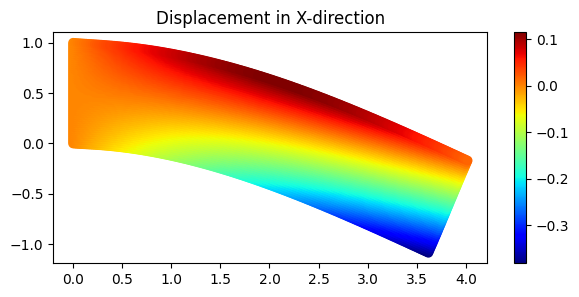

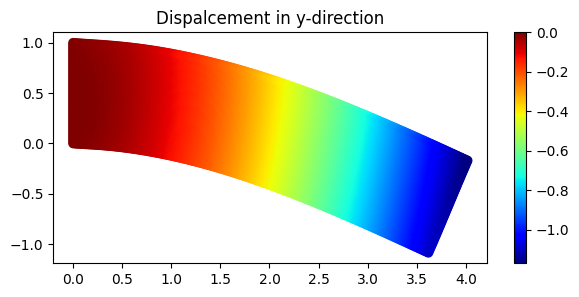

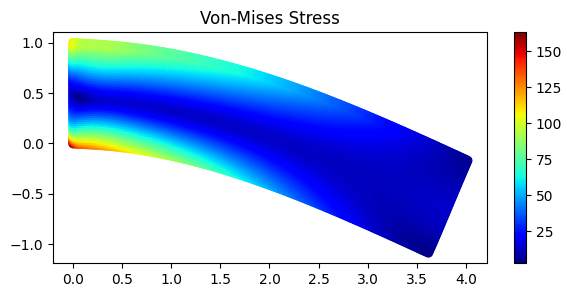

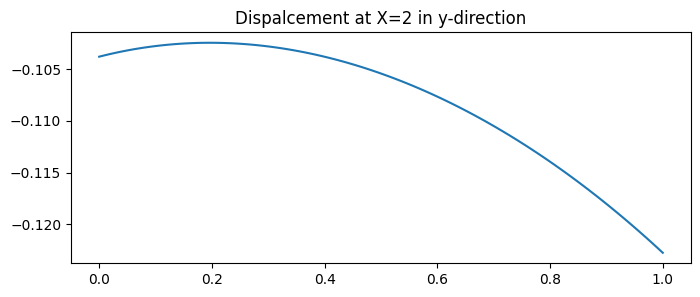

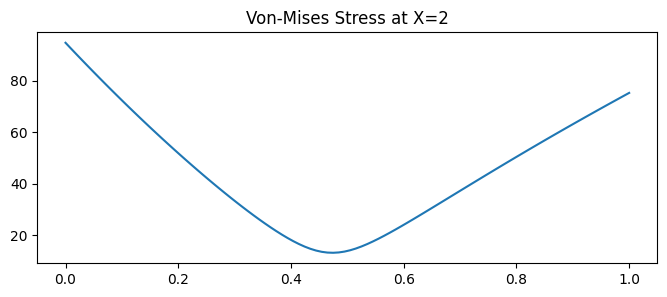

In [5]:
dem.plot_deformed_displacement()

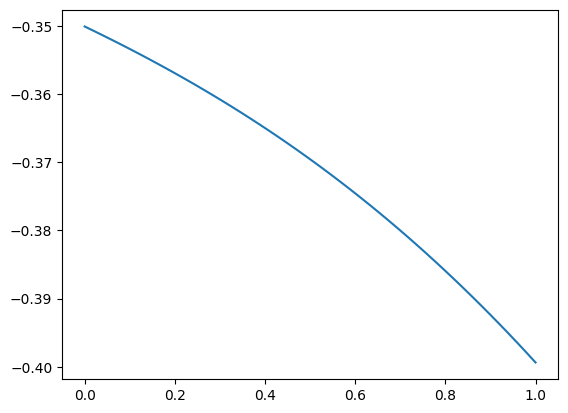

In [6]:
plt.plot(np.expand_dims(dem.y, axis=-1), dem.surUy[:, -100])

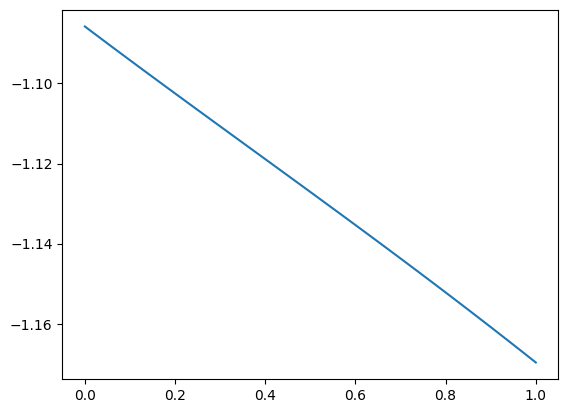

In [7]:
plt.plot( np.expand_dims(dem.y, axis=-1), dem.surUy[:,-1])

In [8]:
plt.scatter(x)

NameError: name 'x' is not defined